# Proyecto Sprint 9 - Aprendizaje supervisado
***
Los clientes de **Beta Bank** se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor **F1** de al menos **0.59**. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica **AUC-ROC** y compararla con el valor **F1**.

## Instrucciones del proyecto
***
Para este proyecto estaremos trabajando con los siguientes puntos:

1. Descarga y prepara los datos.  Explica el procedimiento.

2. Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.

3. Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.

4. Realiza la prueba final.

## Importar bibliotecas
***

In [1]:
# Importar bibliotecas
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

## Preprocesamiento de datos y EDA
***

En esta primera parte del proyecto, revisaré el DataFrame con el objetivo de encontrar problemas e inconsistencias en los datos.


In [2]:
# Cargar archivo
df = pd.read_csv('/datasets/Churn.csv') 

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
print(df.shape)
df.dtypes

(10000, 14)


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Descripción y observaciones del DataFrame

Cada observación en el dataset contiene información del comportamiento sobre un cliente. La información dada es la siguiente:

**Características:**

<code style="background:grey;color:black">RowNumber</code> : índice de cadena de datos
<br>
<code style="background:grey;color:black">CustomerId</code> : identificador de cliente único
<br>
<code style="background:grey;color:black">Surname</code> : apellido
<br>
<code style="background:grey;color:black">CreditScore</code> : valor de crédito
<br>
<code style="background:grey;color:black">Geography</code> : país de residencia
<br>
<code style="background:grey;color:black">Gender</code> : sexo
<br>
<code style="background:grey;color:black">Age</code> : edad
<br>
<code style="background:grey;color:black">Tenure</code> : período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
<br>
<code style="background:grey;color:black">Balance</code> : saldo de la cuenta
<br>
<code style="background:grey;color:black">NumOfProducts</code> : número de productos bancarios utilizados por el cliente
<br>
<code style="background:grey;color:black">HasCrCard</code> : el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
<br>
<code style="background:grey;color:black">IsActiveMember</code> : actividad del cliente (1 - sí; 0 - no)
<br>
<code style="background:grey;color:black">EstimatedSalary</code> : salario estimado

**Objetivo**

<br>
<code style="background:grey;color:black">Exited</code> : El cliente se ha ido (1 - sí; 0 - no)

Hay un total de 10.000 observaciones.




















En el DataFrame hay tres inconvenientes que deben abordarse:

1. En la columna <code style="background:grey;color:black">Tenure</code> hay **9.091** que contiene datos, lo que significa que tenemos **909 valores NaN**
2. Algunas de las columnas parecen proporcionar poca relevancia al planteamiento general del problema y serán filtradas. <code style="background:grey;color:black">RowNumber</code>, <code style="background:grey;color:black">CustomerId</code>, 
<code style="background:grey;color:black">Surname</code>
3. En las columnas <code style="background:grey;color:black">Geography</code> y <code style="background:grey;color:black">Gender</code> el Dtype es object que no es beneficioso para que nuestro modelo funcione. 

#### Convertir valores de NaN a valores medianos

En la columna <code style="background:grey;color:black">Tenure</code> hay algunos valores NaN que se sustituirán por los valores medianos.

In [7]:
median = df['Tenure'].median()
print(median)

5.0


In [8]:
df['Tenure'].fillna(median, inplace=True)

#### Filtracion de columnas

Como las columnas <code style="background:grey;color:black">RowNumber</code>, <code style="background:grey;color:black">CustomerId</code>,
<code style="background:grey;color:black">Gender</code> no son relevantes para el modelo. Eliminaré estas columnas del DataFrame.

In [9]:
not_used = ['RowNumber', 'CustomerId', 'Surname']

df = df.drop(not_used, axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


#### Transformación de características categóricas en numéricas.

Los valores en las columnas <code style="background:grey;color:black">Geography</code> y <code style="background:grey;color:black">Gender</code> son categóricos. Estos se convertirán a valores numéricos utilizando la función pd.get_dummies.

In [10]:
df_ohe = pd.get_dummies(df, drop_first=True)

#### Observaciones

In [11]:
df_ohe.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


In [12]:
print(df_ohe.shape)
df_ohe.info()

(10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


El DataFrame actualizado tiene el aspecto que se muestra arriba.

1. Hay un total de 10.000 observaciones.
2. Ya no hay valores NaN en el DataFrame
3. Todas las columnas ahora son uniformes y contienen valores numéricos.
4. Se han eliminado las columnas que no son necesarias para nuestro modelo.

### Separación de características y objetivo.

In [13]:
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

### Escalado y estandarización de características.

In [14]:
numeric = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age', 'NumOfProducts', 'Tenure']
for col in features[numeric]:
    minimo = features[col].min()
    maximo = features[col].max()
    print(f"Columna: {col}, minimo: {minimo}, maximo: {maximo}")

Columna: CreditScore, minimo: 350, maximo: 850
Columna: Balance, minimo: 0.0, maximo: 250898.09
Columna: EstimatedSalary, minimo: 11.58, maximo: 199992.48
Columna: Age, minimo: 18, maximo: 92
Columna: NumOfProducts, minimo: 1, maximo: 4
Columna: Tenure, minimo: 0.0, maximo: 10.0


In [15]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features[numeric])

features[numeric] = scaler.transform(features[numeric])

In [16]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,-0.911583,1,1,0.021886,0,0,0
1,-0.440036,0.198164,-1.448581,0.117350,-0.911583,0,1,0.216534,0,1,0
2,-1.536794,0.293517,1.087768,1.333053,2.527057,1,0,0.240687,0,0,0
3,0.501521,0.007457,-1.448581,-1.225848,0.807737,0,0,-0.108918,0,0,0
4,2.063884,0.388871,-1.086246,0.785728,-0.911583,1,1,-0.365276,0,1,0


### Creacion de datasets para entrenamiento, validacion y prueba.

Dividir los datos en tres submuestras para tres propósitos diferentes: entrenamiento, validación y prueba.
Dividiré la muestra en la proporción de la siguiente manera:
- 60% entrenamiento
- 20% validación
- 20% prueba

In [17]:
# Datos de entrenamiento.

features_train, sub_features, target_train, sub_target = train_test_split(
    features, target, test_size=0.40, random_state=12345)

# Datos de validacion y prueba.

features_val, features_test, target_val, target_test = train_test_split(
    sub_features, sub_target, test_size=0.50, random_state=12345)

print('Tamaño de la muestra de entrenamiento:', features_train.shape[0])
print('Tamaño de la muestra de validación:', features_val.shape[0])
print('Tamaño de la muestra de prueba:', features_test.shape[0])

Tamaño de la muestra de entrenamiento: 6000
Tamaño de la muestra de validación: 2000
Tamaño de la muestra de prueba: 2000


## Modeling
***

### Desequilibrio de clases
***

A continuacion vamos a examinar que tan equilibradas se encuentran las clases, para despues entrenar un modelo sin tener en cuenta lo anterior y ver su rendimiento.


0    7963
1    2037
Name: Exited, dtype: int64
0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

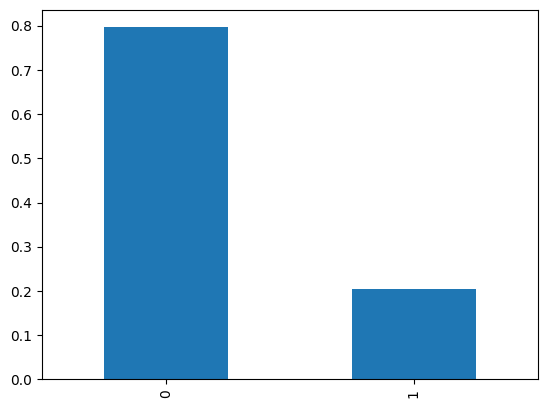

In [18]:
class_frequency = df_ohe['Exited'].value_counts(normalize=True)
print(df_ohe['Exited'].value_counts())
print(class_frequency)
class_frequency.plot(kind='bar')

Podemos ver que las clases en efecto se encuentran desbalanceadas, vamos a entrenar distintos modelos y calcularemos su calidad con diferentes metricas.

### Decision Tree Classifier con clases desbalanceadas

In [19]:
%%time

for depth in range(1,9):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    
    predictions_val = model.predict(features_val)
    predictions_test = model.predict(features_test)
    
    accuracy_val = accuracy_score(target_val, predictions_val)
    f1_val = f1_score(target_val, predictions_val)
    
    accuracy_test = accuracy_score(target_test, predictions_test)
    f1_test = f1_score(target_test, predictions_test)
    
    print(f'max_depth={depth}, accuracy_valid={accuracy_val}, f1_valid={f1_val}, accuracy_test={accuracy_test}, f1_test={f1_test}')

max_depth=1, accuracy_valid=0.791, f1_valid=0.0, accuracy_test=0.7885, f1_test=0.0
max_depth=2, accuracy_valid=0.824, f1_valid=0.5217391304347825, accuracy_test=0.817, f1_test=0.4986301369863014
max_depth=3, accuracy_valid=0.838, f1_valid=0.4234875444839857, accuracy_test=0.83, f1_test=0.3795620437956204
max_depth=4, accuracy_valid=0.852, f1_valid=0.5528700906344411, accuracy_test=0.832, f1_test=0.48307692307692307
max_depth=5, accuracy_valid=0.853, f1_valid=0.5406249999999999, accuracy_test=0.842, f1_test=0.5015772870662459
max_depth=6, accuracy_valid=0.858, f1_valid=0.5696969696969697, accuracy_test=0.8485, f1_test=0.5359877488514548
max_depth=7, accuracy_valid=0.8505, f1_valid=0.5320813771517998, accuracy_test=0.8375, f1_test=0.4976816074188563
max_depth=8, accuracy_valid=0.85, f1_valid=0.5454545454545454, accuracy_test=0.833, f1_test=0.48773006134969327
CPU times: user 199 ms, sys: 0 ns, total: 199 ms
Wall time: 205 ms


Por el planteamiento del problema sabemos que el valor objetivo de F1 es **0,59**. Para este primer modelo de árbol de decisión, nuestra prueba falló con una puntuación máxima F1 en el conjunto de validación de **0,56** y en el conjunto de pruebas de **0,53**

### Random Forest Classifier con clases desbalanceadas

In [20]:
%%time

for est in range(10, 100, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    
    predictions_val = model.predict(features_val)
    predictions_test = model.predict(features_test)
    
    accuracy_val = accuracy_score(target_val, predictions_val)
    f1_val = f1_score(target_val, predictions_val)
    
    accuracy_test = accuracy_score(target_test, predictions_test)
    f1_test = f1_score(target_test, predictions_test)
    
    print(f'estimators={est}, accuracy_valid={accuracy_val}, f1_valid={f1_val}, accuracy_test={accuracy_test}, f1_test={f1_test}')

estimators=10, accuracy_valid=0.85, f1_valid=0.5508982035928144, accuracy_test=0.84, f1_test=0.5046439628482972
estimators=20, accuracy_valid=0.849, f1_valid=0.5451807228915662, accuracy_test=0.844, f1_test=0.5258358662613981
estimators=30, accuracy_valid=0.856, f1_valid=0.5688622754491017, accuracy_test=0.846, f1_test=0.536144578313253
estimators=40, accuracy_valid=0.8545, f1_valid=0.5597579425113465, accuracy_test=0.844, f1_test=0.5258358662613981
estimators=50, accuracy_valid=0.857, f1_valid=0.5718562874251497, accuracy_test=0.8445, f1_test=0.5337331334332834
estimators=60, accuracy_valid=0.8575, f1_valid=0.5739910313901345, accuracy_test=0.845, f1_test=0.5345345345345346
estimators=70, accuracy_valid=0.8605, f1_valid=0.5817091454272864, accuracy_test=0.8465, f1_test=0.5369532428355959
estimators=80, accuracy_valid=0.859, f1_valid=0.575301204819277, accuracy_test=0.849, f1_test=0.5438066465256798
estimators=90, accuracy_valid=0.8585, f1_valid=0.5769805680119582, accuracy_test=0.8515

No logramos nuestro objetivo con el modelo The Random Forest, por último probaré el modelo de regresión logística.

### Logistic Regression con clases desbalanceadas.

In [21]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

predictions_val = model.predict(features_val)
predictions_test = model.predict(features_test)
    
accuracy_val = accuracy_score(target_val, predictions_val)
f1_val = f1_score(target_val, predictions_val)
    
accuracy_test = accuracy_score(target_test, predictions_test)
f1_test = f1_score(target_test, predictions_test)
    
print(f'accuracy_valid={accuracy_val}, f1_valid={f1_val}, accuracy_test={accuracy_test}, f1_test={f1_test}')

accuracy_valid=0.802, f1_valid=0.33108108108108103, accuracy_test=0.7915, f1_test=0.27478260869565213
CPU times: user 24.9 ms, sys: 23.9 ms, total: 48.8 ms
Wall time: 35.1 ms


El modelo de regresión logística es el modelo que peor se desempeñó en las pruebas.

## Equilibrio de clases
***

Para intentar aumentar la puntuación de F1 voy a equilibrar las clases. Usaré el modelo de árbol de decisión porque aquí obtuvimos las puntuaciones de F1 más cercanas al objetivo de **0,59**

In [22]:
%%time

for depth in range(1,9):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    
    predictions_val = model.predict(features_val)
    predictions_test = model.predict(features_test)
    
    accuracy_val = accuracy_score(target_val, predictions_val)
    f1_val = f1_score(target_val, predictions_val)
    
    accuracy_test = accuracy_score(target_test, predictions_test)
    f1_test = f1_score(target_test, predictions_test)
    
    print(f'max_depth={depth}, accuracy_valid={accuracy_val}, f1_valid={f1_val}, accuracy_test={accuracy_test}, f1_test={f1_test}')

max_depth=1, accuracy_valid=0.7545, f1_valid=0.4994903160040775, accuracy_test=0.74, f1_test=0.48514851485148514
max_depth=2, accuracy_valid=0.765, f1_valid=0.541015625, accuracy_test=0.7465, f1_test=0.5129682997118156
max_depth=3, accuracy_valid=0.765, f1_valid=0.541015625, accuracy_test=0.7465, f1_test=0.5129682997118156
max_depth=4, accuracy_valid=0.711, f1_valid=0.5277777777777778, accuracy_test=0.7155, f1_test=0.5385239253852393
max_depth=5, accuracy_valid=0.8105, f1_valid=0.5963791267305644, accuracy_test=0.798, f1_test=0.5809128630705395
max_depth=6, accuracy_valid=0.7665, f1_valid=0.5581835383159887, accuracy_test=0.762, f1_test=0.5656934306569343
max_depth=7, accuracy_valid=0.7725, f1_valid=0.5508390918065154, accuracy_test=0.77, f1_test=0.5593869731800767
max_depth=8, accuracy_valid=0.763, f1_valid=0.5398058252427185, accuracy_test=0.7575, f1_test=0.5479962721342032
CPU times: user 240 ms, sys: 61.4 ms, total: 301 ms
Wall time: 356 ms


Con el ajuste del peso de ambas clases pude aumentar los puntajes de F1. Para el conjunto de validación, la puntuación objetivo de F1 se cumplió con **0,59**; sin embargo, la puntuación de F1 del conjunto de pruebas sigue siendo un poco baja, **0,58**. A continuación, continuaré con el sobremuestreo y el submuestreo para ver si podemos alcanzar el puntaje objetivo de F1.

### Sobremuestreo

(10784,)

1    0.554525
0    0.445475
Name: Exited, dtype: float64

1    5980
0    4804
Name: Exited, dtype: int64


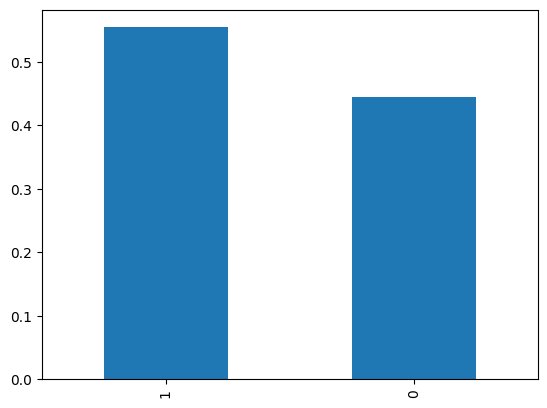

In [23]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 5)




print(target_upsampled.shape)
print()
class_frequency_upsample = target_upsampled.value_counts(normalize=True)
class_frequency_upsample.plot(kind='bar')
print(target_upsampled.value_counts(normalize=True))
print()
print(target_upsampled.value_counts())

In [24]:
%%time

for depth in range(1,9):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)
    
    predictions_val = model.predict(features_val)
    predictions_test = model.predict(features_test)
    
    accuracy_val = accuracy_score(target_val, predictions_val)
    f1_val = f1_score(target_val, predictions_val)
    
    accuracy_test = accuracy_score(target_test, predictions_test)
    f1_test = f1_score(target_test, predictions_test)
    
    print(f'max_depth={depth}, accuracy_valid={accuracy_val}, f1_valid={f1_val}, accuracy_test={accuracy_test}, f1_test={f1_test}')

max_depth=1, accuracy_valid=0.7545, f1_valid=0.4994903160040775, accuracy_test=0.74, f1_test=0.48514851485148514
max_depth=2, accuracy_valid=0.765, f1_valid=0.541015625, accuracy_test=0.7465, f1_test=0.5129682997118156
max_depth=3, accuracy_valid=0.765, f1_valid=0.541015625, accuracy_test=0.7465, f1_test=0.5129682997118156
max_depth=4, accuracy_valid=0.711, f1_valid=0.5277777777777778, accuracy_test=0.7155, f1_test=0.5385239253852393
max_depth=5, accuracy_valid=0.8105, f1_valid=0.5963791267305644, accuracy_test=0.798, f1_test=0.5809128630705395
max_depth=6, accuracy_valid=0.7665, f1_valid=0.5581835383159887, accuracy_test=0.762, f1_test=0.5656934306569343
max_depth=7, accuracy_valid=0.7735, f1_valid=0.5501489572989076, accuracy_test=0.772, f1_test=0.5615384615384615
max_depth=8, accuracy_valid=0.765, f1_valid=0.5401174168297456, accuracy_test=0.758, f1_test=0.5468164794007491
CPU times: user 283 ms, sys: 7.76 ms, total: 291 ms
Wall time: 304 ms


Con el sobremuestreo todavía no logramos el puntaje objetivo de F1 y, por lo tanto, continuaré con el submuestreo.

### Submuestreo

(2397,)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

0    1201
1    1196
Name: Exited, dtype: int64


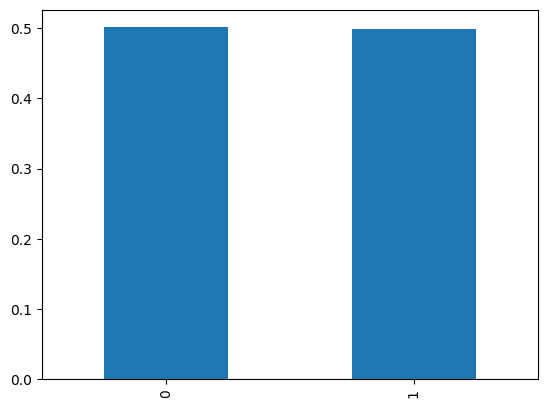

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.shape)
print()
class_frequency_downsample = target_downsampled.value_counts(normalize=True)
class_frequency_downsample.plot(kind='bar')
print(target_downsampled.value_counts(normalize=True))
print()
print(target_downsampled.value_counts())

In [26]:
%%time

for depth in range(1,9):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_downsampled, target_downsampled)
    
    predictions_val = model.predict(features_val)
    predictions_test = model.predict(features_test)
    
    accuracy_val = accuracy_score(target_val, predictions_val)
    f1_val = f1_score(target_val, predictions_val)
    
    accuracy_test = accuracy_score(target_test, predictions_test)
    f1_test = f1_score(target_test, predictions_test)
    
    print(f'max_depth={depth}, accuracy_valid={accuracy_val}, f1_valid={f1_val}, accuracy_test={accuracy_test}, f1_test={f1_test}')

max_depth=1, accuracy_valid=0.7405, f1_valid=0.5061845861084681, accuracy_test=0.725, f1_test=0.4878957169459963
max_depth=2, accuracy_valid=0.749, f1_valid=0.5394495412844036, accuracy_test=0.731, f1_test=0.5109090909090909
max_depth=3, accuracy_valid=0.768, f1_valid=0.5555555555555556, accuracy_test=0.7505, f1_test=0.5261158594491927
max_depth=4, accuracy_valid=0.7205, f1_valid=0.5360995850622406, accuracy_test=0.7245, f1_test=0.5396825396825397
max_depth=5, accuracy_valid=0.8, f1_valid=0.5943204868154158, accuracy_test=0.811, f1_test=0.608695652173913
max_depth=6, accuracy_valid=0.775, f1_valid=0.576271186440678, accuracy_test=0.776, f1_test=0.5897435897435899
max_depth=7, accuracy_valid=0.7345, f1_valid=0.5271593944790739, accuracy_test=0.7355, f1_test=0.5419913419913419
max_depth=8, accuracy_valid=0.7325, f1_valid=0.5218945487042002, accuracy_test=0.7485, f1_test=0.5496866606982991
CPU times: user 137 ms, sys: 3.64 ms, total: 140 ms
Wall time: 154 ms


Finalmente, con el submuestreo logramos alcanzar la puntuación objetivo de F1. Para el conjunto de validación, la puntuación objetivo de F1 se alcanzó en **0.59** y en el conjunto de pruebas la puntuación de F1 terminó en **0.60**.

## AUC-ROC
***

Para evaluar qué tan bien el modelo puede producir puntajes relativos para discriminar entre instancias positivas o negativas en todos los umbrales de clasificación, en la siguiente sección calcularé el puntaje ROC-AUC.

In [27]:
final_model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
final_model.fit(features_downsampled, target_downsampled)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)

[0.05736804 0.69509977 0.61389255 ... 0.05736804 0.03346802 0.89065087]


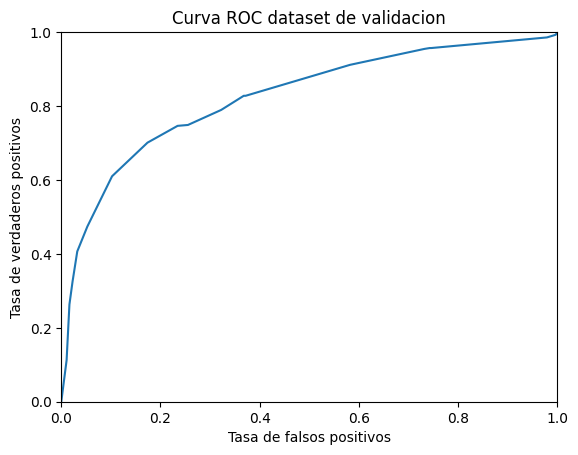

[0.05736804 0.48473758 0.2706174  ... 0.05736804 0.37385743 0.14336875]


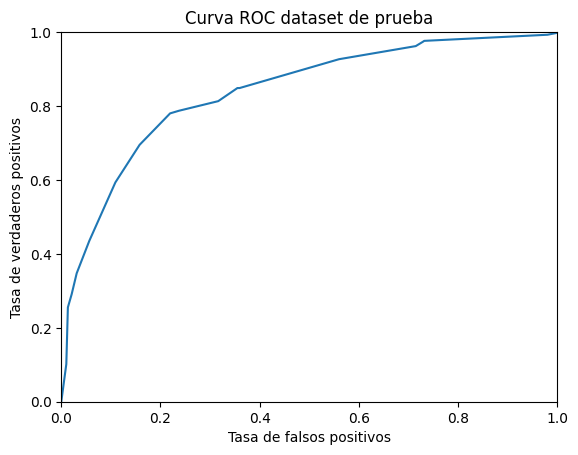

In [28]:
probabilities_valid = final_model.predict_proba(features_val)
probabilities_one_valid = probabilities_valid[:, 1]

probabilities_test = final_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print(probabilities_one_valid)

fpr_valid, tpr_valid, thresholds = roc_curve(target_val, probabilities_one_valid)

plt.figure()
plt.plot(fpr_valid, tpr_valid)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC dataset de validacion')
plt.show()

fpr_test, tpr_test, thresholds = roc_curve(target_test, probabilities_one_test)

print(probabilities_one_test)

plt.figure()
plt.plot(fpr_test, tpr_test)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC dataset de prueba')
plt.show()

In [29]:
fpr_val, tpr_val, thresholds_val = roc_curve(target_val, probabilities_one_valid)

fpr_test, tpr_test, thresholds_test = roc_curve(target_test, probabilities_one_test)

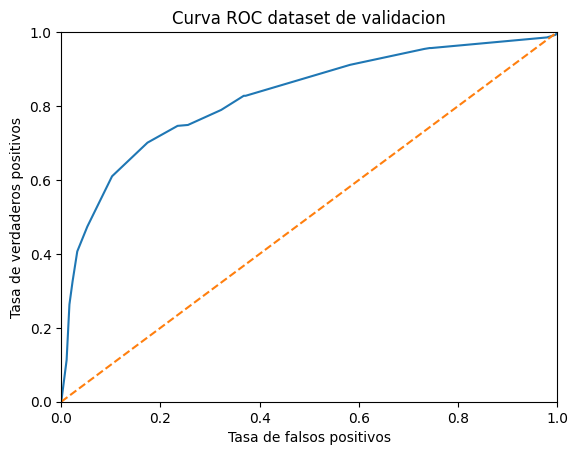

In [30]:
# Curva ROC dataset de validacion
plt.figure()

plt.plot(fpr_val, tpr_val)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

plt.title('Curva ROC dataset de validacion')
plt.show()

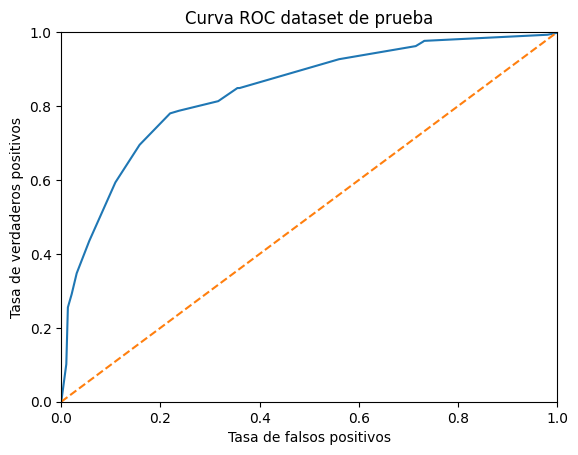

In [31]:
# Curva ROC dataset de prueba
plt.figure()

plt.plot(fpr_test, tpr_test)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

plt.title('Curva ROC dataset de prueba')
plt.show()

In [32]:
auc_roc_valid = roc_auc_score(target_val, probabilities_one_valid)
auc_roc_test = roc_auc_score(target_test, probabilities_one_test)

print(f'Área Bajo la Curva ROC para el dataset de validacion = {auc_roc_valid}')
print()
print(f'Área Bajo la Curva ROC para el dataset de prueba = {auc_roc_test}')

Área Bajo la Curva ROC para el dataset de validacion = 0.8241029464247908

Área Bajo la Curva ROC para el dataset de prueba = 0.8383867684249502


La puntuación ROC-AUC puede variar de 0 a 1. Una puntuación de 0,5 indica conjeturas aleatorias y una puntuación de 1 indica un desempeño perfecto.
En nuestro modelo alcanzamos una puntuación ROC-AUC de **0,82** en el conjunto de validación y una puntuación ROC-AUC de **0,83** en el conjunto de pruebas. Las puntuaciones ROC-AUC alcanzadas por el modelo son satisfactorias y muestran que hemos creado un modelo que está lejos de predecir de forma aleatoria y que Beta Bank puede utilizar para predecir si un cliente abandonará el banco pronto.